<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST106-CS4B/blob/main/4B_VICTORIA_MP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST106 - Perception and Computer Vision**
##**MACHINE PROBLEM 1**
###**Lesly-Ann B. Victoria from BSCS-4B**

In [ ]:
#Import necessary libraries.
import cv2
import numpy as np
import matplotlib.pyplot as plt

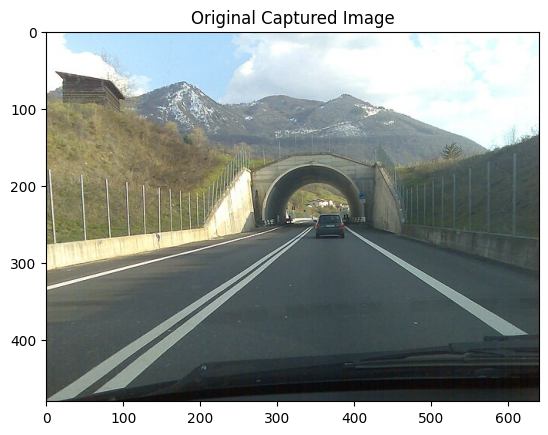

In [ ]:
#Read the captured image.
image = cv2.imread('image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Captured Image')
plt.show()

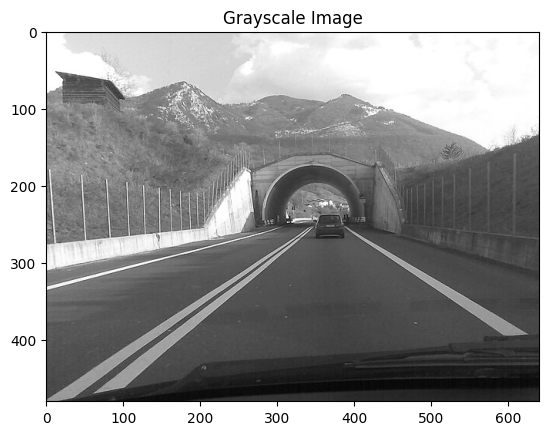

In [ ]:
#Convert the Original Captured Image to Grayscale Image.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

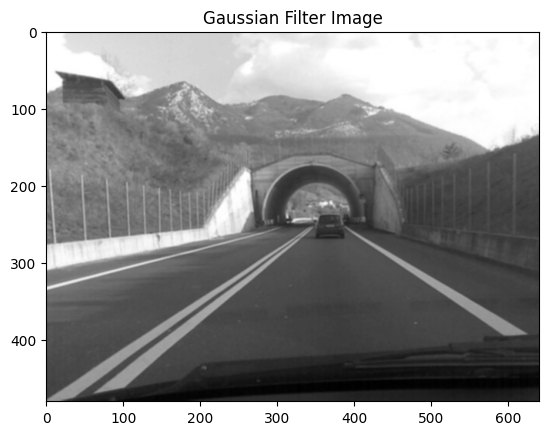

In [ ]:
#Apply Gaussian Filter to the Grayscale Image to reduce noise and detail.
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Filter Image')
plt.show()

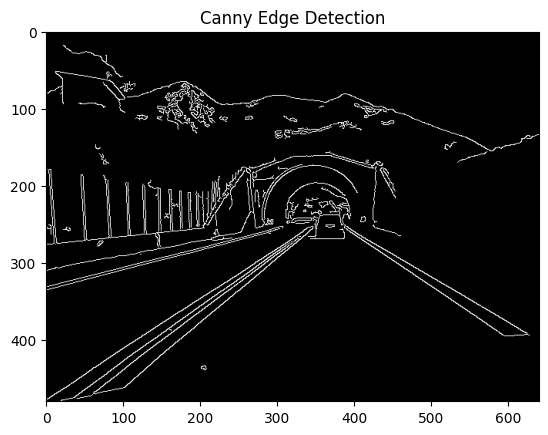

In [ ]:
#Perform Canny Edge Detection Technique on the Gaussian Filter Image.
edges = cv2.Canny(blurred_image, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

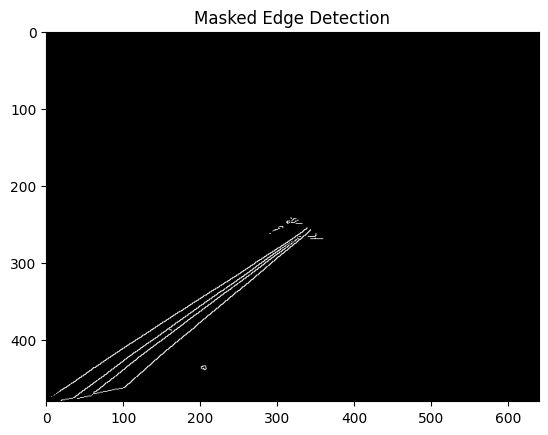

In [ ]:
from ssl import PROTOCOL_TLSv1
#Define the region of interest (ROI) to focus on relevant edges.
height, width = edges.shape
mask = np.zeros_like(edges)
polygon = np.array([[
    (0, height),
    (width, height),
    (width // 2, height // 2)
]], np.int32)
cv2.fillPoly(mask, polygon, 255)

#Apply the mask to the edges.
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges,cmap='gray')
plt.title('Masked Edge Detection')
plt.show()

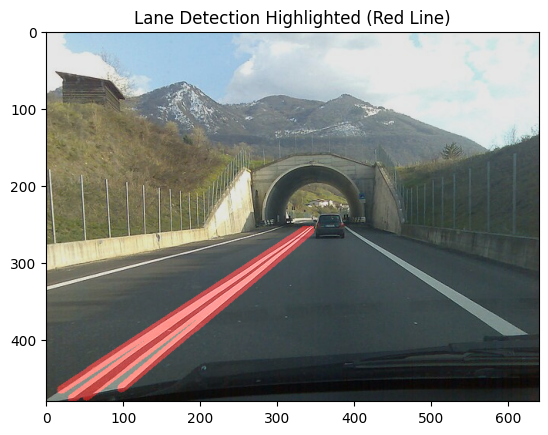

In [ ]:
#Detect lines in the Masked Edge Image using the Hough Line Transform.
lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)
line_image = np.zeros_like(image)

#Check if any lines are detected to avoid errors.
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)

#Combine with the Original Captured Image.
combined_image = cv2.addWeighted(image, 0.9, line_image, 0.5, 0)

#Display the final image with detected lanes highlighted.
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('Lane Detection Highlighted (Red Line)')
plt.show()